[View in Colaboratory](https://colab.research.google.com/github/Abey12525/PYTHON_GEN/blob/master/googleDop.ipynb)

In [3]:
!pip install --upgrade --no-cache-dir dopamine-rl
!pip install cmake
!pip install atari_py

    100% |████████████████████████████████| 71kB 2.6MB/s 
    100% |████████████████████████████████| 1.5MB 13.5MB/s 
    100% |████████████████████████████████| 1.0MB 14.2MB/s 
  Running setup.py install for gym ... - \ | done
    100% |████████████████████████████████| 17.7MB 1.4MB/s 
    100% |████████████████████████████████| 768kB 5.7MB/s 
  Running setup.py bdist_wheel for atari-py ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.

In [0]:
import numpy as np 
import os
from dopamine.agents.dqn import dqn_agent
from dopamine.atari import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags

BASE_PATH = '/temp/colab_dope_run'
GAME = 'Asterix'

In [0]:
#create agent 
LOG_PATH = os.path.join(BASE_PATH, 'basic_agent', GAME)

class BasicAgent(object):
  def __init__(self, sess, num_actions, switch_prob = 0.1):
    self._sess = sess
    self._num_actions = num_actions
    self._switch_prob = switch_prob
    self._last_action = np.random.randint(num_actions)
    self.eval_mode = False
    
  def _choose_actions(self):
    #define our policy 
    if np.random.random() <= self._switch_prob:
      self._last_action = np.random.randint(self._num_actions)
    return self._last_action
  
  def bundle_and_checkpoint(self, unused_checkpoint_dir, unused_iteration):
    pass
  
  def unbundle(self, unused_checkpoint_dir,
               unused_checkpoint_version, 
               unused_data):
    pass
  
  def begin_episode(self, unused_observation):
    return self._choose_actions()
  
  def end_episode(self, unused_reward):
    pass
  
  def step(self, reward, observation):
    return self._choose_actions()
  
def create_basic_agent(sess, environment):
  return BasicAgent(sess,
                    num_actions = environment.action_space.n,
                    switch_prob = 0.2)
  
basic_runner = run_experiment.Runner(LOG_PATH, 
                                     create_basic_agent, 
                                     game_name = GAME , 
                                     num_iterations = 200 ,
                                     training_steps =10, 
                                     evaluation_steps = 10 ,
                                     max_steps_per_episode = 100)

In [16]:
basic_runner.run_experiment()
print("training done")

INFO:tensorflow:Beginning training...
INFO:tensorflow:Starting iteration 0
INFO:tensorflow:Average undiscounted return per training episode: 0.00
INFO:tensorflow:Average training steps per second: 750.73
INFO:tensorflow:Average undiscounted return per evaluation episode: 50.00
INFO:tensorflow:Starting iteration 1
INFO:tensorflow:Average undiscounted return per training episode: 50.00
INFO:tensorflow:Average training steps per second: 736.16
INFO:tensorflow:Average undiscounted return per evaluation episode: 300.00
INFO:tensorflow:Starting iteration 2
INFO:tensorflow:Average undiscounted return per training episode: 100.00
INFO:tensorflow:Average training steps per second: 741.21
INFO:tensorflow:Average undiscounted return per evaluation episode: 50.00
INFO:tensorflow:Starting iteration 3
INFO:tensorflow:Average undiscounted return per training episode: 150.00
INFO:tensorflow:Average training steps per second: 695.12
INFO:tensorflow:Average undiscounted return per evaluation episode: 15

In [0]:
#load base line data 
!gsutil -q -m cp -R gs://download-dopamine-rl/preprocessed-benchmarks/* /content/
experimental_data = colab_utils.load_baselines('/content')

In [21]:
basic_data = colab_utils.read_experiment(log_path = LOG_PATH, verbose = True)
basic_data['agent'] = 'BasicAgent'
basic_data['run_number'] = 1
experimental_data[GAME] = experimental_data[GAME].merge(basic_data,
                                                        how='outer')

Reading statistics from: /temp/colab_dope_run/basic_agent/Asterix//logs/log_199


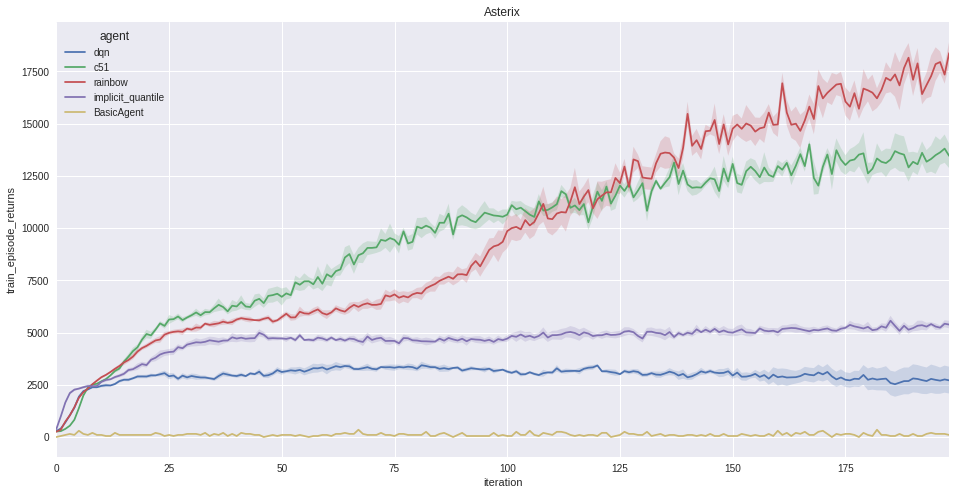

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.tsplot(data = experimental_data[GAME], 
           time = 'iteration', 
           unit='run_number',
          condition = 'agent',
          value = 'train_episode_returns',
          ax=ax)
plt.title(GAME)
plt.show()
